## `MeshArrays.jl` test suite uses the `MeshArrays.smooth` function


Let's use `Plots.jl` with the `GR.jl` backend on top of `MeshArrays.jl` to visualize results:

In [7]:
using MeshArrays, Plots; gr()

Plots.GRBackend()

Define a grid with `6` faces of `16*16` points and distances, areas, etc. all set to `1.0`:

In [8]:
GCMGridOnes("cs",6,16)

"GCMGridOnes: passed"

Smooth a randomly initialized `Rini` at 3 grid point scales (`DXCsm,DYCsm`):

In [9]:
(Rini,Rend,DXCsm,DYCsm)=demo2();

Define `qwckplot` and use it to vizualize the resulting `Rend`:

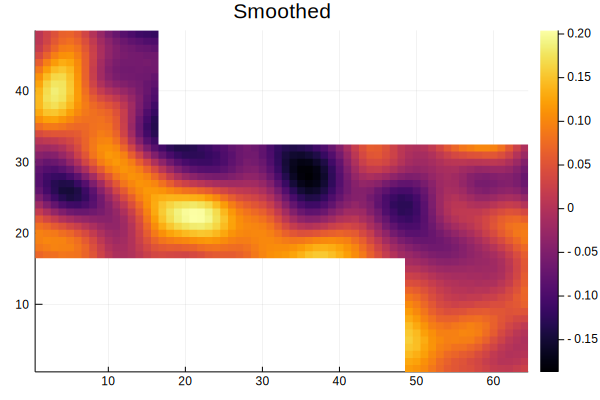

In [10]:
function qwckplot(fld::gcmfaces,ttl::String)
    arr=convert2array(fld)
    arr=permutedims(arr,[2 1])
    #This uses Plots.jl:
    p=heatmap(arr,title=ttl)
end

qwckplot(Rend,"Smoothed noise")

Note the increased smoothness and reduced magnitude as compared with `Rini`:

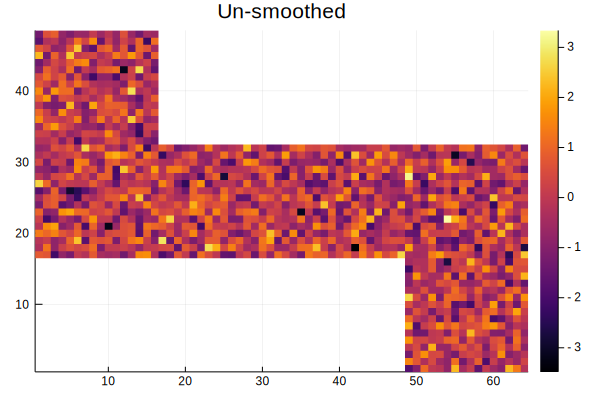

In [11]:
qwckplot(Rini,"Original noise")

To finish, let's benchmark `smooth` as a function of smoothing scale parameters:

In [12]:
@time Rend=smooth(Rini,DXCsm,DYCsm);
@time Rend=smooth(Rini,2DXCsm,2DYCsm);

  0.002910 seconds (12.04 k allocations: 6.913 MiB)
  0.016968 seconds (45.79 k allocations: 24.728 MiB, 39.90% gc time)
